In [18]:
import pandas as pd
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

In [2]:
import pandas as pd
import json

# Cargar el archivo JSON línea por línea
with open('Sports_and_Outdoors_5.json', 'r') as file:
    data = []
    for line in file:
        try:
            data.append(json.loads(line))  # Cargar cada línea como un objeto JSON
        except json.JSONDecodeError:
            continue  # Si hay un error en una línea, se omite

# Convertir los datos a un DataFrame
df = pd.DataFrame(data)

# Seleccionar y ordenar las columnas
columns = ['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime']
df_s = df[columns]

# Mostrar la tabla ordenada
print(df_s)

# Guardar la tabla ordenada en un archivo CSV
df_s.to_csv('Sports_and_Outdoors_5.csv', index=False)


            reviewerID        asin  \
0         AIXZKN4ACSKI  1881509818   
1       A1L5P841VIO02V  1881509818   
2        AB2W04NI4OEAD  1881509818   
3       A148SVSWKTJKU6  1881509818   
4        AAAWJ6LW9WMOO  1881509818   
...                ...         ...   
296332  A2XX2A4OJCDNLZ  B00LFPS0CY   
296333  A3LGT6UZL99IW1  B00LFPS0CY   
296334   ASKZO80Z1RKTR  B00LFPS0CY   
296335   APRNS6DB68LLV  B00LFPS0CY   
296336  A3UJRNI8UR4871  B00LFPS0CY   

                                            reviewerName helpful  \
0                                           David Briner  [0, 0]   
1                                        Jason A. Kramer  [1, 1]   
2                                             J. Fernald  [2, 2]   
3                         Jusitn A. Watts "Maverick9614"  [0, 0]   
4                                           Material Man  [0, 0]   
...                                                  ...     ...   
296332                               RatherLiveInKeyWest  [2, 3]   

In [6]:
df_s

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5.0,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5.0,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4.0,"It's a punch, that's all.",1330387200,"02 28, 2012"
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4.0,It's a punch with a Glock logo.,1328400000,"02 5, 2012"
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4.0,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013"
...,...,...,...,...,...,...,...,...,...
296332,A2XX2A4OJCDNLZ,B00LFPS0CY,RatherLiveInKeyWest,"[2, 3]",This is a water bottle done right. It is a ver...,5.0,Hydracentials Sporty 25 Oz Stainless Steel Wat...,1405036800,"07 11, 2014"
296333,A3LGT6UZL99IW1,B00LFPS0CY,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",If you're looking for an insulated water bottl...,5.0,"Large, incredibly well made water bottle!",1405641600,"07 18, 2014"
296334,ASKZO80Z1RKTR,B00LFPS0CY,Robin Lee,"[0, 0]","This Hydracentials Sporty 25 OZ, double insula...",5.0,"""Great Water Bottle For Hot Day""......",1405900800,"07 21, 2014"
296335,APRNS6DB68LLV,B00LFPS0CY,"Rob Slaven ""slavenrm@gmail. com""","[1, 1]",As usual I received this item free in exchange...,5.0,A pretty impressive water bottle. Best I've s...,1405900800,"07 21, 2014"


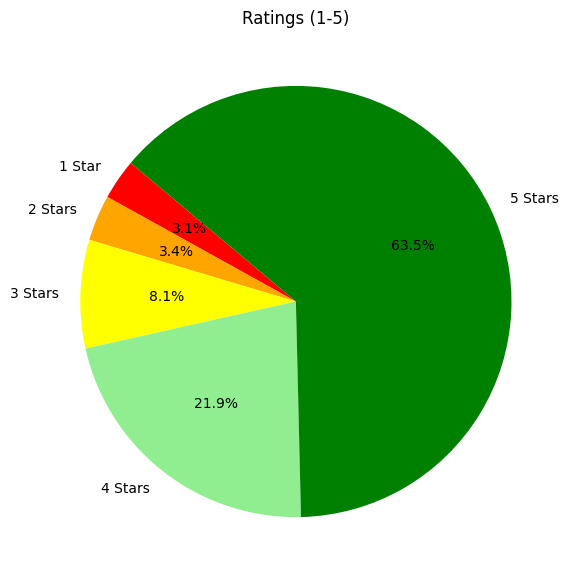

In [7]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Cargar el archivo JSON línea por línea
data = []
with open('Sports_and_Outdoors_5.json', 'r') as file:
    for line in file:
        try:
            review = json.loads(line)
            data.append(review)  # Cargar cada línea como un objeto JSON
        except json.JSONDecodeError:
            continue  # Si hay un error en una línea, se omite

# Contar las calificaciones de 1 a 5
ratings = [review.get("overall", 0) for review in data if "overall" in review]
ratings_count = Counter(ratings)

# Datos para el gráfico
labels = ["1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"]
sizes = [ratings_count.get(i, 0) for i in range(1, 6)]
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']

# Crear el gráfico de pastel
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Ratings (1-5)")
plt.show()

In [8]:
# rating realizado por los encuestados para valorar el hobby o actividad deportiva dejando que la mayoría de encuestados nos dió una buena valoración

In [16]:
# Seleccionar y ordenar las columnas
columns = ['reviewText', 'overall']
df_s = df[columns]

# Filtrar las reseñas con rating de 5
df_5_star = df_s[df_s['overall'] == 5]

# Opcional: Guardar la tabla en un archivo CSV
df_5_star.to_csv('5_star_reviews_organized.csv', index=False)

df_5_star

,reviewText,overall
0,This came in on time and I am veru happy with ...,5.0
1,I had a factory Glock tool that I was using fo...,5.0
5,"Needed this tool to really break down my G22, ...",5.0
6,If u don't have it .. Get it. All you need to ...,5.0
8,"Light and laser torch work well, very bright. ...",5.0
...,...,...
296332,This is a water bottle done right. It is a ver...,5.0
296333,If you're looking for an insulated water bottl...,5.0
296334,"This Hydracentials Sporty 25 OZ, double insula...",5.0
296335,As usual I received this item free in exchange...,5.0


In [17]:
columns = ['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime']
df_s = df[columns]

# Filtrar las reseñas con rating de 5
df_5_star = df_s[df_s['overall'] == 5]

# Calcular la cantidad de palabras en cada reviewText
df_5_star['word_count'] = df_5_star['reviewText'].apply(lambda x: len(str(x).split()))

# Encontrar la reseña con la mayor cantidad de palabras
max_word_review = df_5_star.loc[df_5_star['word_count'].idxmax()]

# Mostrar el análisis
print("Análisis de la reseña con la mayor cantidad de palabras:")
print(f"Reviewer Name: {max_word_review['reviewerName']}")
print(f"Review Text: {max_word_review['reviewText']}")
print(f"Cantidad de palabras: {max_word_review['word_count']}")
print(f"Rating: {max_word_review['overall']}")
print(f"Fecha de la reseña: {max_word_review['reviewTime']}")

Análisis de la reseña con la mayor cantidad de palabras:
Reviewer Name: Scott
Review Text: P90X is a 6/7 day "fitness" program combing strength training, cardio, and nutrition. It is intended to be used by people who are already moderately fit (or at the least, not completely sedentary and unfit) and want an "extreme" training program.  I would definitely not recommend P90X for people who are medically obese or who have never done any real exercise before.  It is of course better than nothing, but very overweight people will struggle with many of the exercises.  The Beachbody web site has a fitness test that it  recommends people take before starting the program.  This will tell you whether you have the basic physical and cardiovascular strength to get the most out of the program.  For those who might not be ready for P90X yet, I recommend starting withPower 90 In-Home Boot Camp.  It is a good primer since many of the exercises from that program make their way over to P90X.  The majori

C:\Users\USER\AppData\Local\Temp\ipykernel_21644\207819340.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_star['word_count'] = df_5_star['reviewText'].apply(lambda x: len(str(x).split()))


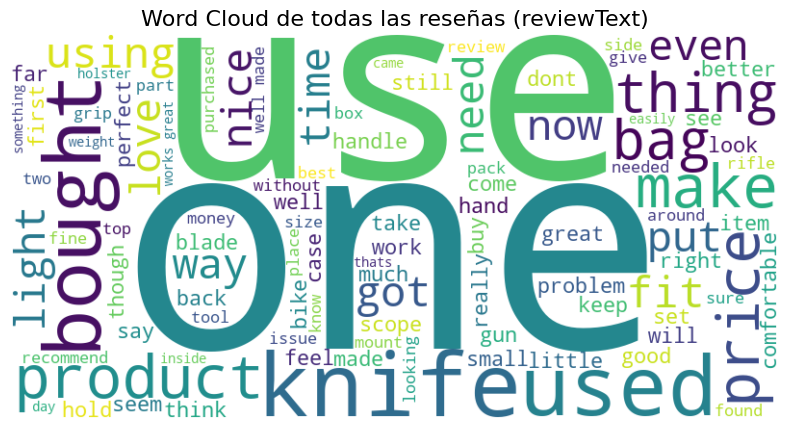

In [20]:
review_texts = df['reviewText'].dropna().tolist()  # Unir todos los textos y eliminar valores nulos

# Unir todos los reviewText en un solo texto
all_reviews = " ".join(review_texts)

# Preprocesar el texto: eliminar puntuación, convertir a minúsculas y eliminar stopwords
stopwords_es = set(stopwords.words('spanish'))  # Usar stopwords en español
all_reviews_cleaned = re.sub(r'[^\w\s]', '', all_reviews.lower())  # Eliminar puntuación y convertir a minúsculas
words = all_reviews_cleaned.split()  # Dividir el texto en palabras
filtered_words = [word for word in words if word not in stopwords_es and len(word) > 2]  # Filtrar stopwords y palabras cortas

# Unir las palabras filtradas en un solo texto
filtered_text = " ".join(filtered_words)

# Generar la Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,  # Número máximo de palabras en la nube
    colormap='viridis',  # Mapa de colores
).generate(filtered_text)

# Mostrar la Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.title("Word Cloud de todas las reseñas (reviewText)", fontsize=16)
plt.show()

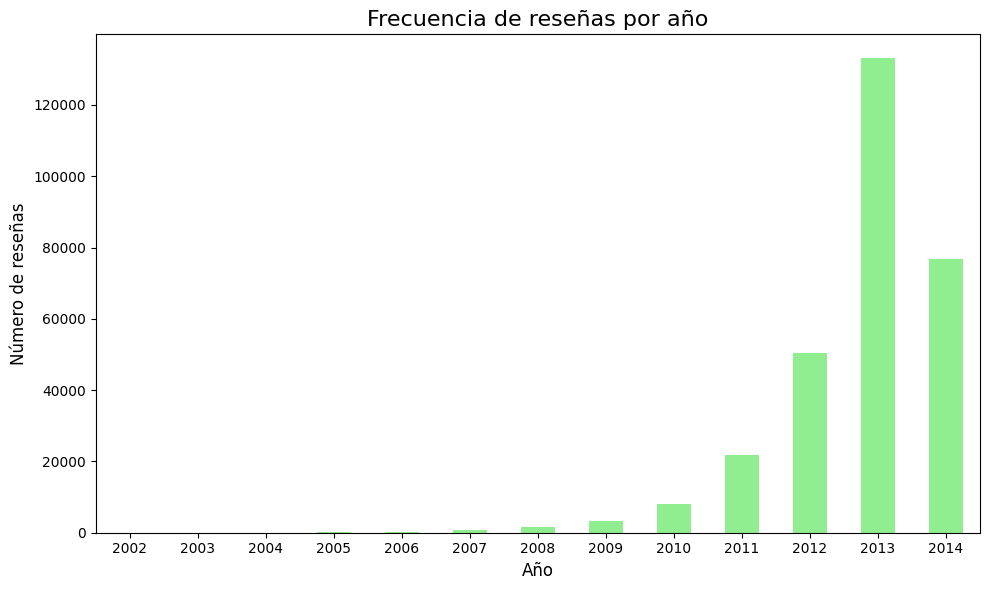

In [26]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')  # Convertir a formato de fecha

df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

# Extraer el año de la fecha
df['year'] = df['reviewTime'].dt.year

# Contar la frecuencia de reseñas por año
review_counts = df['year'].value_counts().sort_index()  # Ordenar por año

# Graficar el diagrama de barras
plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar', color='lightgreen')
plt.title('Frecuencia de reseñas por año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de reseñas', fontsize=12)
plt.xticks(rotation=0)  # No rotar las etiquetas del eje x
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
import json
from textblob import TextBlob
import matplotlib.pyplot as plt

In [29]:
df['reviewText'] = df['reviewText'].astype(str)  # Asegurar que todos los textos sean strings

# Función para calcular el sentimiento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Polaridad: -1 (negativo) a 1 (positivo)

# Aplicar la función a cada reviewText
df['sentiment'] = df['reviewText'].apply(get_sentiment)

# Clasificar el sentimiento como "bueno" o "malo"
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'bueno' if x > 0 else 'malo')

# Mostrar algunas reseñas con su sentimiento
print(df[['reviewText', 'sentiment', 'sentiment_label']].head())

                                          reviewText  sentiment  \
0  This came in on time and I am veru happy with ...   0.681667   
1  I had a factory Glock tool that I was using fo...   0.300000   
2  If you don't have a 3/32 punch or would like t...   0.366667   
3  This works no better than any 3/32 punch you w...   0.150000   
4  I purchased this thinking maybe I need a speci...  -0.129932   

  sentiment_label  
0           bueno  
1           bueno  
2           bueno  
3           bueno  
4            malo  


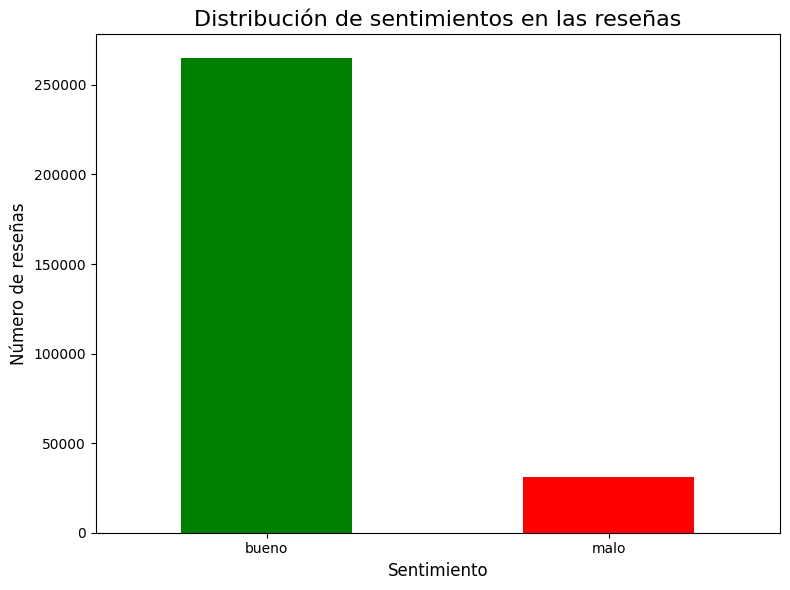

In [30]:
# Graficar la distribución de sentimientos
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de sentimientos en las reseñas', fontsize=16)
plt.xlabel('Sentimiento', fontsize=12)
plt.ylabel('Número de reseñas', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()